In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Importing the dataset
df = pd.read_csv('twitter_training.csv')
df.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
44626,11664,Verizon,Positive,I'm pleased a announce Verizon awarded its $50...
41956,1598,Battlefield,Negative,Why the heaven<unk> NOBODY playing Rush on Bat...
11044,13098,Xbox(Xseries),Positive,Remember Me be one of the great stealth games ...
69691,3941,Cyberpunk2077,Neutral,"""Punk 2077"" is being postponed because it is n..."
63413,7669,MaddenNFL,Negative,@EAMaddenNFL now this is a messed up rating......


In [4]:
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.columns


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
print('length of data is', len(df))


length of data is 74681


In [7]:
df. shape


(74681, 4)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
df.dtypes


2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object

In [10]:
np.sum(df.isnull().any(axis=1))


686

In [11]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   4
Count of rows in the data is:   74681


In [13]:
df['Borderlands'].unique()


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

KeyError: ignored

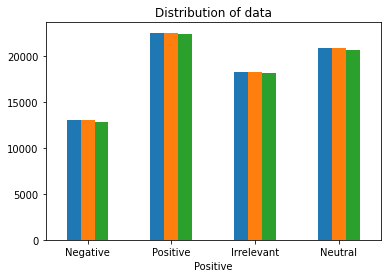

In [17]:
# Plotting the distribution for dataset.
ax = df.groupby('Positive').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive','Irrelevant','Neutral'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])
